In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('webmd.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [6]:
min(df['Date'])

'1/1/2008'

In [7]:
max(df['Date'])

'9/9/2019'

In [16]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [32]:
df['Condition'].unique().size

1806

In [36]:
print(df['Age'].unique())
print(df['Age'].unique().size)

['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6']
12


In [12]:
df.isnull().sum().sum()

37

In [100]:
df_ost = df.loc[df['Condition'].str.contains("Osteoporosis", case=False)]

In [101]:
df_ost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 4147 to 361296
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2278 non-null   object
 1   Condition      2278 non-null   object
 2   Date           2278 non-null   object
 3   Drug           2278 non-null   object
 4   DrugId         2278 non-null   int64 
 5   EaseofUse      2278 non-null   int64 
 6   Effectiveness  2278 non-null   int64 
 7   Reviews        2278 non-null   object
 8   Satisfaction   2278 non-null   int64 
 9   Sex            2278 non-null   object
 10  Sides          2278 non-null   object
 11  UsefulCount    2278 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 231.4+ KB


In [102]:
print(df_ost['Condition'].unique())
print(df_ost['Condition'].unique().size)

['Osteoporosis' 'Post-Menopausal Osteoporosis Prevention'
 'Osteoporosis in Male Patient'
 'Aromatase Inhibitor Drug-Induced Osteoporosis'
 'Osteoporosis in Men due to Deficient Function of Testis'
 'Glucocorticoid-Induced Osteoporosis Prevention'
 'Osteoporosis caused by Glucocorticoid Drugs'
 'osteoporosis in postmenopausal woman at high risk for fracture'
 'Osteoporosis caused by Anti-Androgen Drugs']
9


<AxesSubplot:xlabel='Age', ylabel='Count'>

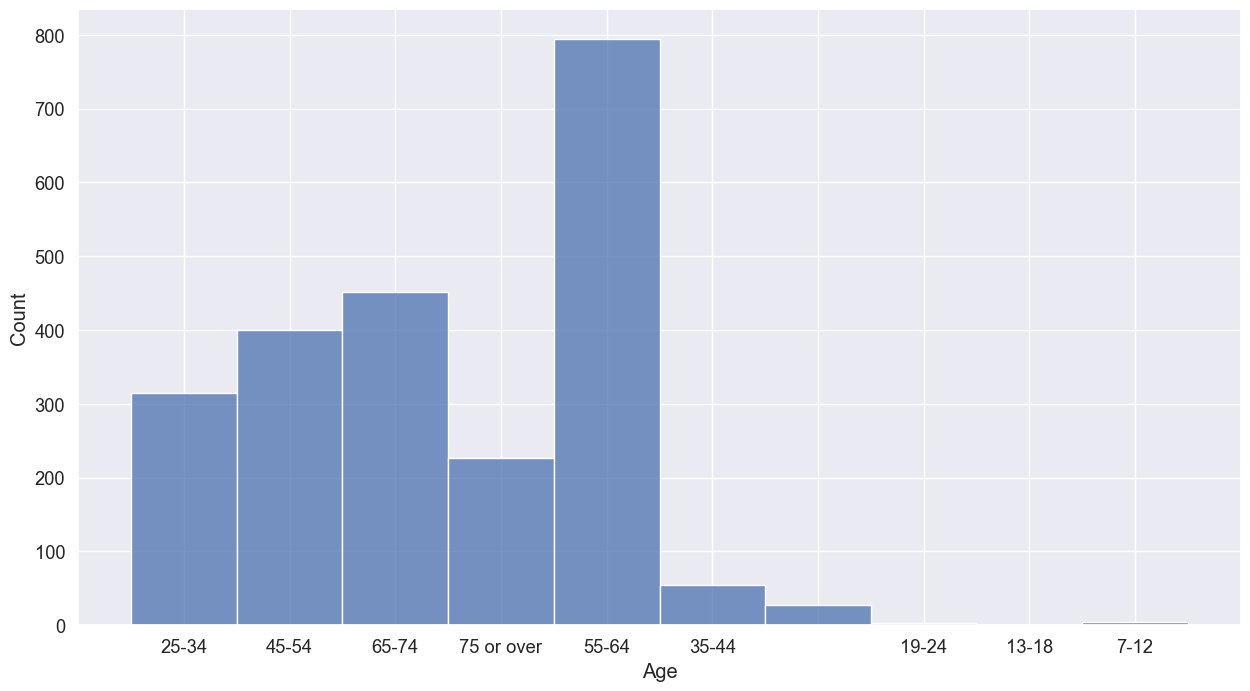

In [103]:
sns.histplot(x = 'Age', data = df_ost)

In [104]:
print(min(df_ost['Date']))
print(max(df_ost['Date']))

1/1/2008
9/9/2015


In [105]:
print("number of males: ", sum(df_ost['Sex'] == 'Male'))
print("number of females: ", sum(df_ost['Sex'] == 'Female'))

number of males:  434
number of females:  1643


<AxesSubplot:title={'center':'Distribution of Satisfaction'}, xlabel='Satisfaction', ylabel='Count'>

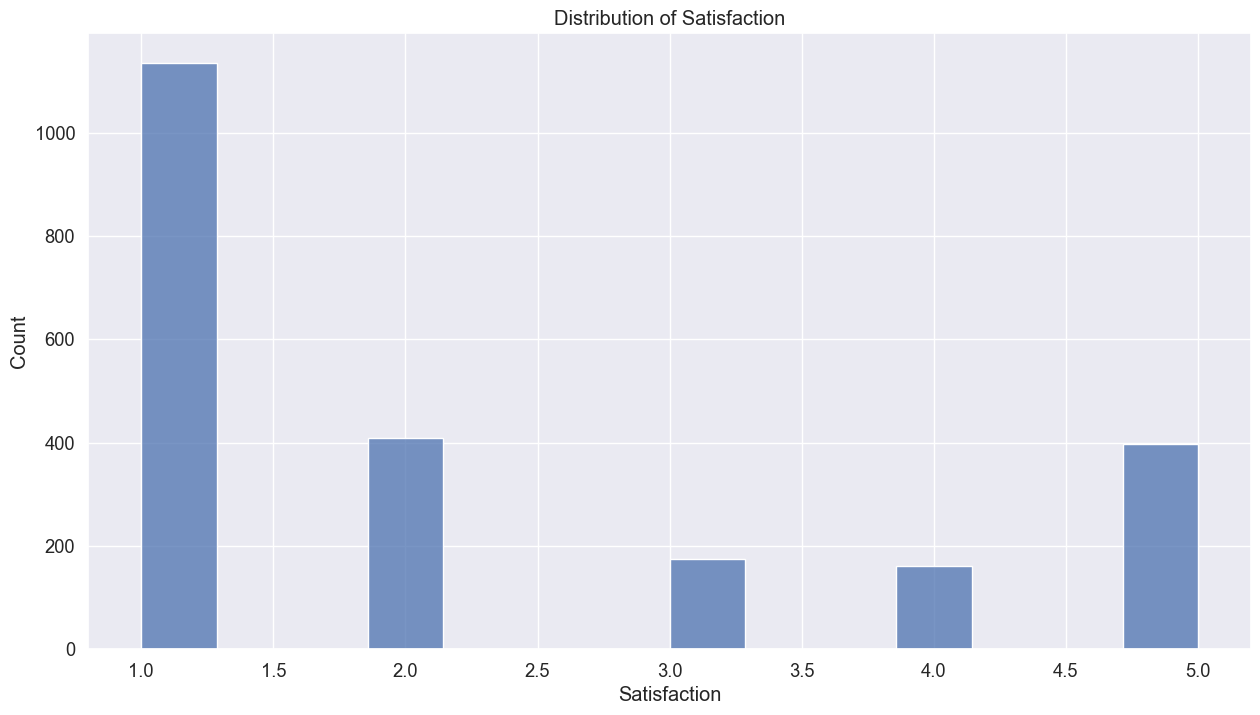

In [106]:
plt.title('Distribution of Satisfaction')
sns.histplot(x="Satisfaction", data = df_ost)

In [107]:
df_ost['Satisfaction'].groupby(df_ost['Drug']).mean().sort_values(ascending=False)

Drug
replesta                                            5.0
bio-d-mulsion forte drops                           5.0
calcium 600-vit d3                                  5.0
calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet    5.0
citracal-vitamin d tablet                           5.0
                                                   ... 
risedronate 150 mg tablet                           1.0
estradiol transdermal patch patch, weekly           1.0
oyster shell + d                                    1.0
os-cal 500-vit d3                                   1.0
risedronate sodium                                  1.0
Name: Satisfaction, Length: 275, dtype: float64

Text(0, 0.5, 'Count')

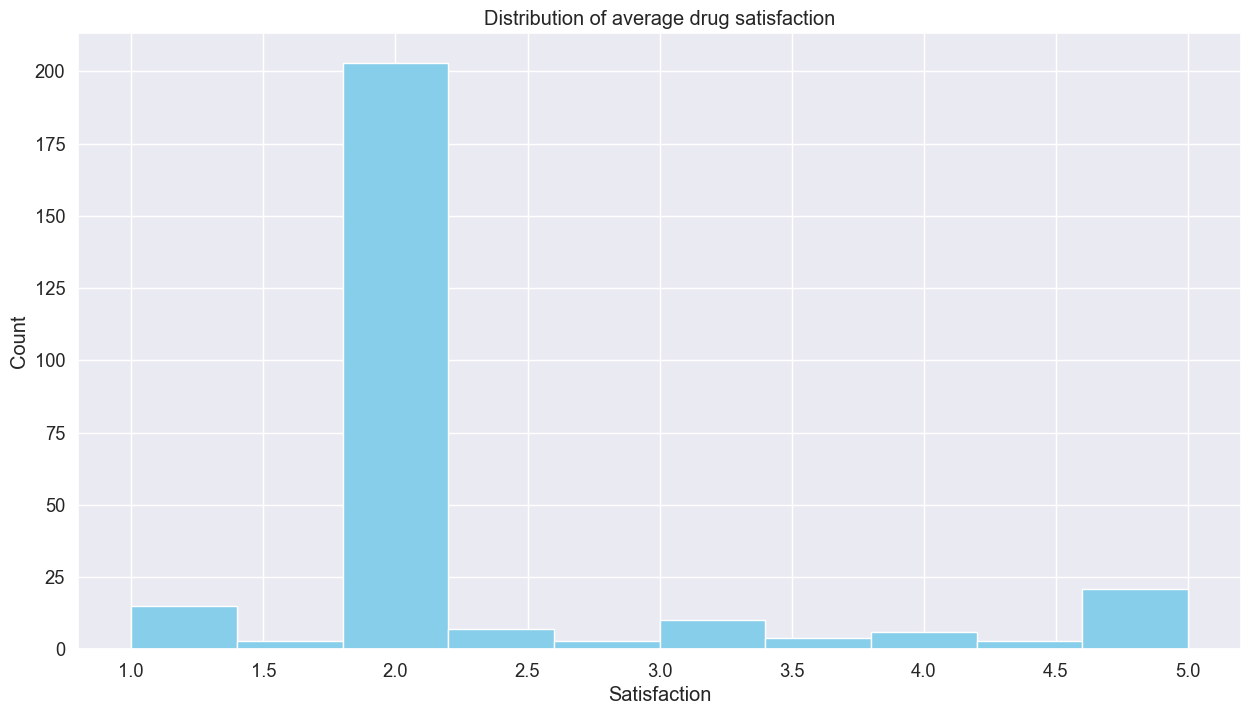

In [108]:
rating_avgs = (df_ost['Satisfaction'].groupby(df_ost['Drug']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Distribution of average drug satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

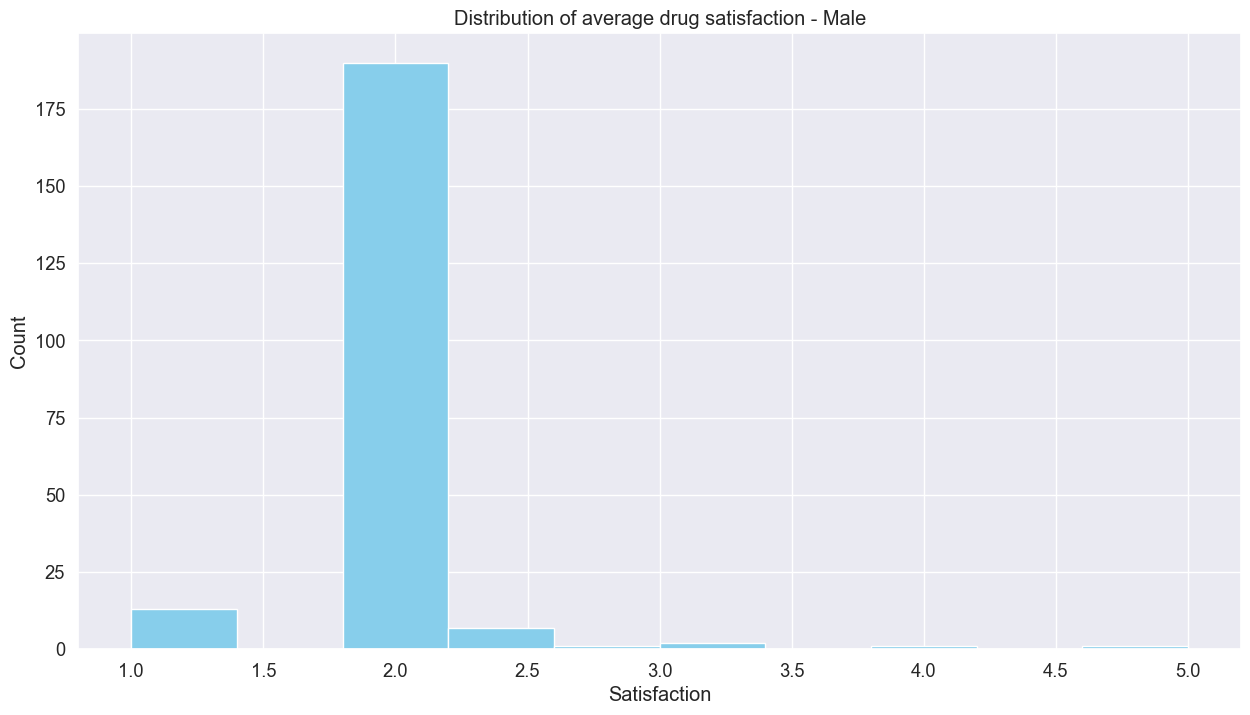

In [109]:
df_ost_male = df_ost[df_ost['Sex'] == 'Male']
#df_ost_male['Satisfaction'].groupby(df_ost['Drug']).mean().sort_values(ascending=False)

male_rating_avgs = (df_ost_male['Satisfaction'].groupby(df_ost['Drug']).mean())
male_rating_avgs.hist(color='skyblue')
plt.title('Distribution of average drug satisfaction - Male')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

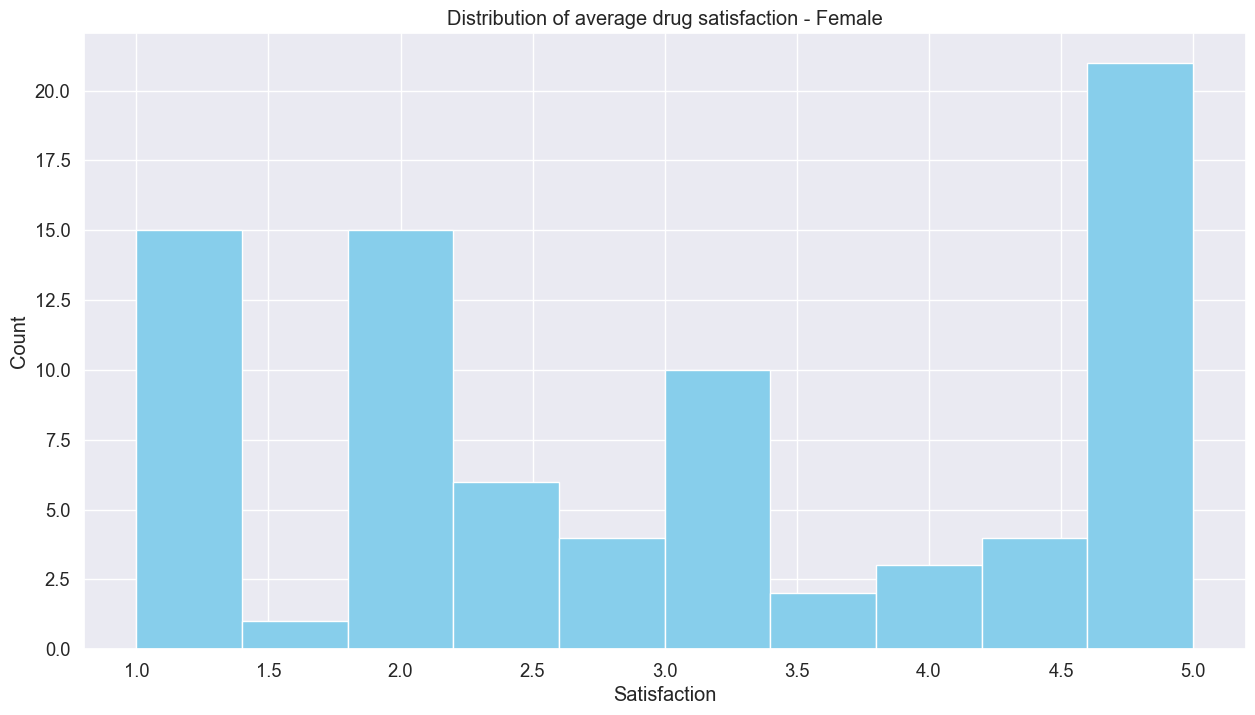

In [110]:
df_ost_female = df_ost[df_ost['Sex'] == 'Female']
#df_ost_male['Satisfaction'].groupby(df_ost['Drug']).mean().sort_values(ascending=False)

female_rating_avgs = (df_ost_female['Satisfaction'].groupby(df_ost['Drug']).mean())
female_rating_avgs.hist(color='skyblue')
plt.title('Distribution of average drug satisfaction - Female')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

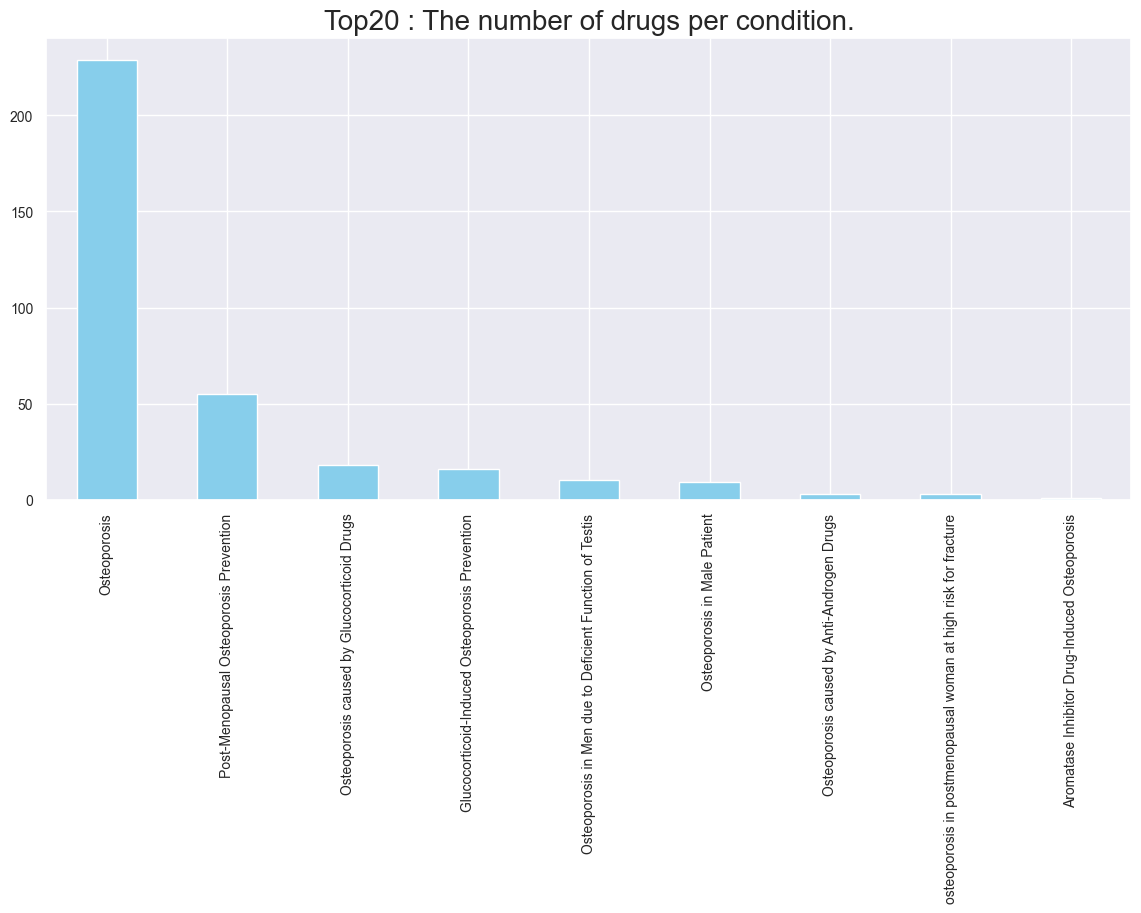

In [111]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="skyblue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

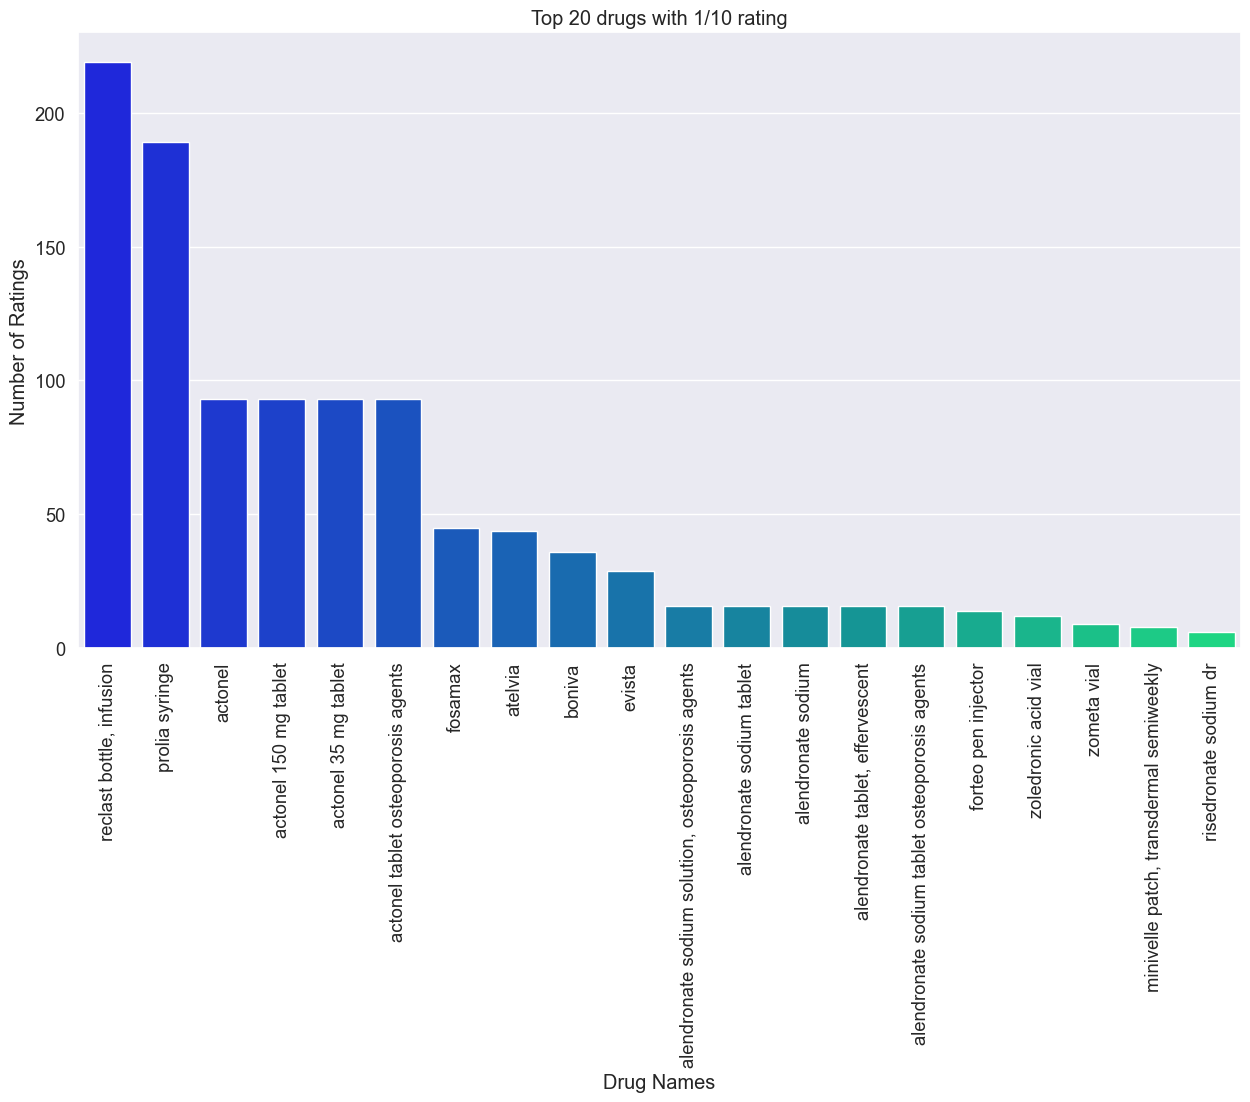

In [112]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [113]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in df_ost.Condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_ost[df_ost.Condition == i].Drug.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_ost.Drug == j) >= 10:
            temp_ls.append((j, np.sum(df_ost[df_ost.Drug == j].Satisfaction) / np.sum(df_ost.Drug == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [120]:
help_dict['Osteoporosis'].iloc[:100]

,drug,average_rating
0,"reclast bottle, infusion",2.773196
1,zometa vial,2.277778
2,prolia syringe,2.047445
3,agrylin,2.000000
4,hydrea,2.000000
5,actonel tablet osteoporosis agents,1.979310
6,actonel 35 mg tablet,1.979310
7,actonel 150 mg tablet,1.979310
8,actonel,1.979310
9,atelvia,1.745763


In [117]:
df_ost.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
4147,25-34,Osteoporosis,3/16/2010,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0
6181,25-34,Osteoporosis,3/15/2010,lopressor ampul,6878,4,3,this treatment is awsome. I love drugs.,2,Male,,0
6192,45-54,Post-Menopausal Osteoporosis Prevention,7/31/2017,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0
6207,45-54,Post-Menopausal Osteoporosis Prevention,12/29/2016,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1
7554,25-34,Osteoporosis,3/16/2010,lithostat,9290,4,3,this treatment is awsome. I love drugs.,2,Male,"Headache , nausea , vomiting , stomach ups...",0
18993,65-74,Osteoporosis,5/26/2010,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1
19282,25-34,Osteoporosis,3/15/2010,lincomycin hcl vial,5641,4,3,this treatment is awsome. I love drugs.,2,Male,"Nausea , vomiting , diarrhea , or headache ...",0
22344,25-34,Osteoporosis,3/16/2010,"latisse drops, with applicator",151740,4,3,this treatment is awsome. I love drugs.,2,Male,Eye redness/discomfort/ itching /dryness or e...,2
35711,25-34,Osteoporosis,3/16/2010,l-phenylalanine,4453,4,3,this treatment is awsome. I love drugs.,2,Male,,0
36663,25-34,Osteoporosis,3/15/2010,levemir vial,95095,4,3,this treatment is awsome. I love drugs.,2,Male,"Injection site reactions (such as pain, rednes...",0


In [126]:
df.loc[df['Drug'].str.contains("tymlos", case=False)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
189842,55-64,osteoporosis in postmenopausal woman at high r...,2/27/2020,tymlos pen injector,173586,5,1,It’s easy to do but no where on the side effec...,1,Female,Dizziness or fast heartbeat may occur within ...,0
189843,55-64,osteoporosis in postmenopausal woman at high r...,2/5/2020,tymlos pen injector,173586,5,5,I do have about a two hour increase in heart r...,4,Female,Dizziness or fast heartbeat may occur within ...,0
189844,65-74,osteoporosis in postmenopausal woman at high r...,1/1/2020,tymlos pen injector,173586,3,3,i frill diary often during the day and it make...,1,,Dizziness or fast heartbeat may occur within ...,0
189845,65-74,Decreased Bone Mass Following Menopause,9/28/2019,tymlos pen injector,173586,3,3,The drug is very easy to use. I have only bee...,1,,Dizziness or fast heartbeat may occur within ...,4
189846,55-64,Decreased Bone Mass Following Menopause,7/24/2019,tymlos pen injector,173586,5,5,I have had NO side effects. I inject myself be...,5,Female,Dizziness or fast heartbeat may occur within ...,5
189847,75 or over,Decreased Bone Mass Following Menopause,4/26/2019,tymlos pen injector,173586,1,1,This drug causes an extreme reaction in my 89 ...,1,Female,Dizziness or fast heartbeat may occur within ...,6
189848,55-64,Decreased Bone Mass Following Menopause,1/27/2019,tymlos pen injector,173586,3,3,I can only give myself a shot every other day ...,2,,Dizziness or fast heartbeat may occur within ...,23
